# CHURN PROJECT

<img src="https://www.voxco.com/wp-content/w3-webp/uploads/2021/09/Everything-you-need-to-know-about-Customer-Churn1.jpgw3.webp" />
<br>
<br>
<hr class="dotted">
<br>
<br>


# First Step - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#path = r"C:\Users\MI\Downloads\Python Project\churn_w.csv"
df = pd.read_csv('churn_w.csv')
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [91]:
def datapreview(data):
    print('Number of rows: ', data.shape[0])
    print("\nNumber of features:", data.shape[1])
    print("\nData Features:")
    print(data.columns.tolist())
    print("\nUnique values:")
    print(data.nunique())
    print("\nTypes of values:")
    print(data.dtypes)
    
datapreview(df)

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Types of values:
customerID           object
gender        

#### Columns
 
Those the descriptions of the variables in this dataset:

<table>
    <tr><th> customerID </th><td> Cusctomer's ID </td></tr>
    <tr><th> gender </th><td> Gender <br>  "male / female" </td> </tr>
    <tr><th> SeniorCitizen </th><td> Whether the customer is a senior citizen or not <br> "1 / 0" </td></tr>
    <tr><th> Partner </th><td>  Whether the customer has a partner or not <br> "Yes / No" </td></tr>
    <tr><th> Dependents </th><td> Whether the customer has dependents or not <br>  "Yes / No" </td></tr>
    <tr><th> tenure </th><td> Number of months the customer has stayed with the company <br> numeric variable </td></tr>
    <tr><th> PhoneService </th><td> Whether the customer has a phone service or not <br>  "Yes / No"</td></tr>
    <tr><th> MultipleLines </th><td> Whether the customer has multiple lines or not <br> "Yes / No / No phone service" </td></tr>
    <tr><th> InternetService </th><td> Customers internet service provider <br>  "DSL / Fiber optic / No" </td></tr>
    <tr><th> OnlineSecurity </th><td> Whether the customer has online security or not <br> "Yes / No / No internet service" </td></tr>
    <tr><th> OnlineBackup </th><td> Whether the customer has online backup or not <br> "Yes / No / No internet service" </td></tr>
    <tr><th> DeviceProtection </th><td> Whether the customer has device protection or not <br> "Yes / No / No internet service" </td></tr>
    <tr><th> TechSupport </th><td> Whether the customer has tech support or not <br> "Yes / No / No internet service" </td></tr>
    <tr><th> StreamingTV </th><td> Whether the customer has streaming TV or not <br> "Yes / No / No internet service" </td></tr>
    <tr><th> StreamingMovies </th><td> Whether the customer has streaming movies or not <br> "Yes / No / No internet service"</td></tr>
    <tr><th> Contract </th><td> The contract term of the customer <br> "Month-to-month / One year / Two years" </td></tr>
    <tr><th> PaperlessBilling </th><td> Whether the customer has paperless billing or not <br> "Yes / No" </td></tr>
    <tr><th> PaymentMethod </th><td> The customer's payment method <br> "Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic) </td></tr>
    <tr><th> MonthlyCharges </th><td> The amount charged to the customer monthly <br> numeric variable  </td></tr>
    <tr><th> TotalCharges </th><td> The total amount charged to the customer <br> numeric variable </td></tr>
    <tr><th> Churn </th><td> Whether the customer churned or not <br> "Yes / No" </td></tr>
    
</table>


In [92]:
## No missing values yet???
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

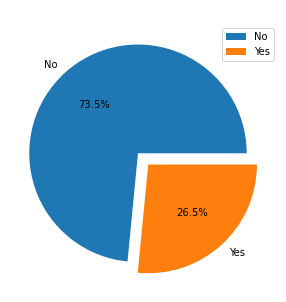

In [93]:
#leg_churn = { "No churn":0,  "Churn":1}
plt.figure(figsize=(5,5))
plt.pie(df['Churn'].value_counts(normalize=True),labels=df['Churn'].unique(), autopct='%1.1f%%',explode=(0.07,0.07))
plt.title('Target Variable "churn"', color = 'w')
plt.legend()
plt.savefig('pie_churn.png') 
df.Churn.value_counts(normalize=True)

In [4]:
## Churn column as int

df['Churn'] = df.Churn.map({"Yes": 1, "No": 0})
df['Churn'] = df['Churn'].astype(int)


In [5]:
## there are 7043 clients, 1869 of them are churned, total churn rate is 26.5%

clients = len(df) 
churned = sum(df['Churn']) 

print("We have %d users but %d of them churned (%f%%)" % (clients, churned, (churned/clients*100)))


We have 7043 users but 1869 of them churned (26.536987%)


Now let's take alook at the features one by one (and create some new ones): 

* 1. Customer ID

In [96]:
custsplit = df.customerID.str.split("-", expand=True)
custsplit = custsplit.rename(columns={0 : "Numbers", 1:"Letters"})
custsplit.nunique()

## Letters are unique, numbers aren't (5084 unique numbers from 7040 rows). Maybe will back to this later

Numbers    5084
Letters    7040
dtype: int64

* 2. Gender 

In [97]:
## almoast 50/50 chance for both genders, no visible dependence
df.groupby('gender').agg({'Churn':['count','sum','mean']})

Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

* 3. Seniority

In [98]:
## there are 1142 seniors, 476 of them churned (41.7%), this is much more than not seniors (23.6%)
df.groupby('SeniorCitizen').agg({'Churn':['count','sum', 'mean']})

Churn                
              count   sum      mean
SeniorCitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

* 4. Gender & Seniority


In [99]:
## Again no visible dependence of gender (slightly on female side)
df.groupby(['gender','SeniorCitizen']).agg({'Churn':['count','sum','mean']})

Churn               
                     count  sum      mean
gender SeniorCitizen                     
Female 0              2920  699  0.239384
       1               568  240  0.422535
Male   0              2981  694  0.232808
       1               574  236  0.411150

* 5. Partner

In [100]:
## Those who have partner leave less! (no partne - 33%, has partner - 20%)
df.groupby('Partner').agg({'Churn':['count','sum','mean']})

Churn                
        count   sum      mean
Partner                      
No       3641  1200  0.329580
Yes      3402   669  0.196649

In [101]:
df.groupby(['Partner','SeniorCitizen']).agg({'Churn':['count','sum','mean']})

Churn               
                      count  sum      mean
Partner SeniorCitizen                     
No      0              3072  922  0.300130
        1               569  278  0.488576
Yes     0              2829  471  0.166490
        1               573  198  0.345550

In [6]:
## New Feature - lonelyness feature
df.loc[(df['Partner'] == 'No') & (df['SeniorCitizen'] == 1),'SeniorCitzen_Partner'] = 'lonely SeniorCitzen'
df.loc[(df['Partner'] == 'Yes') & (df['SeniorCitizen'] == 1),'SeniorCitzen_Partner'] = 'Not_lonely SeniorCitzen'
df.loc[(df['SeniorCitizen'] == 0),'SeniorCitzen_Partner'] = 'NOT_SeniorCitzen'
df.groupby('SeniorCitzen_Partner').agg({'Churn':['count', 'sum', 'mean']})

Churn                
                        count   sum      mean
SeniorCitzen_Partner                         
NOT_SeniorCitzen         5901  1393  0.236062
Not_lonely SeniorCitzen   573   198  0.345550
lonely SeniorCitzen       569   278  0.488576

In [103]:
df.groupby(['Partner','gender']).agg({'Churn':['count','sum','mean']})

Churn               
               count  sum      mean
Partner gender                     
No      Female  1800  620  0.344444
        Male    1841  580  0.315046
Yes     Female  1688  319  0.188981
        Male    1714  350  0.204201

* 6. Dependents

In [105]:
## Those who have dependents leave less!
df.groupby('Dependents').agg({'Churn':['count','sum','mean']})

Churn                
           count   sum      mean
Dependents                      
No          4933  1543  0.312791
Yes         2110   326  0.154502

* 7. Partner & Dependents, Individual Clients vs Family Clients

In [106]:
## Partnership and Dependents decreasing Churn
df.groupby(['Partner', 'Dependents']).agg({'Churn':['count','sum','mean']})

Churn                
                   count   sum      mean
Partner Dependents                      
No      No          3280  1123  0.342378
        Yes          361    77  0.213296
Yes     No          1653   420  0.254083
        Yes         1749   249  0.142367

In [7]:
## Individual vs. Family clients: Family clients tend to leave less vs Individual Cliants (19.8% vs 34.2%)

df['Individual'] = 0
df.loc[(df['Partner'] == 'No') & (df['Dependents'] == 'No'),'Individual'] = 1

df.groupby('Individual').agg({'Churn':['count', 'sum', 'mean']})

Churn                
           count   sum      mean
Individual                      
0           3763   746  0.198246
1           3280  1123  0.342378

In [108]:
df.groupby(['SeniorCitizen', 'Dependents']).agg({'Churn':['count','sum','mean']})

Churn                
                         count   sum      mean
SeniorCitizen Dependents                      
0             No          3882  1089  0.280526
              Yes         2019   304  0.150570
1             No          1051   454  0.431970
              Yes           91    22  0.241758

In [109]:
df.groupby(['gender', 'Dependents']).agg({'Churn':['count','sum','mean']})

Churn               
                  count  sum      mean
gender Dependents                     
Female No          2460  774  0.314634
       Yes         1028  165  0.160506
Male   No          2473  769  0.310958
       Yes         1082  161  0.148799

* 8. Contract

In [110]:
## Most of the clients are on mtm contract and they have the highest chance to churn (42.7%!)
## next is 1-y contract and the last is 2-year.
## Seems like its best to push towards 1y contract

df.groupby('Contract').agg({'Churn':['count', 'sum', 'mean']})

Churn                
               count   sum      mean
Contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

* 9. PaperlessBilling

In [111]:
# with paperless billing leave more - nor what I expected
df.groupby('PaperlessBilling').agg({'Churn':['count', 'sum', 'mean']})

Churn                
                 count   sum      mean
PaperlessBilling                      
No                2872   469  0.163301
Yes               4171  1400  0.335651

* 10. PaymentMethod, Automatic payment vs Non Automatic payment:

In [112]:
#clients who use the automatic payment method churn less than the rest
df.groupby('PaymentMethod').agg({'Churn':['count', 'sum', 'mean']})

Churn                
                          count   sum      mean
PaymentMethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

In [8]:
## New Feature - Clearly less churn with automatic payments
df['AutomaticPayment']= 1
df.loc[(df['PaymentMethod']=='Electronic check') | (df['PaymentMethod']=='Mailed check'),'AutomaticPayment'] = 0

df.groupby('AutomaticPayment').agg({'Churn':['count', 'sum', 'mean']})


Churn                
                 count   sum      mean
AutomaticPayment                      
0                 3977  1379  0.346744
1                 3066   490  0.159817

In [114]:
df.groupby(['AutomaticPayment','PaperlessBilling']).agg({'Churn':['count', 'sum', 'mean']})

Churn                
                                  count   sum      mean
AutomaticPayment PaperlessBilling                      
0                No                1579   333  0.210893
                 Yes               2398  1046  0.436197
1                No                1293   136  0.105182
                 Yes               1773   354  0.199662

* 11. Tenure

Text(0.5, 1.0, 'Tenure Distribution')

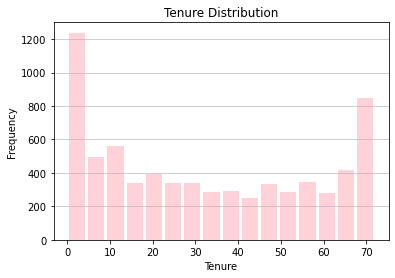

In [115]:
## distribution of tenure

plt.hist(x=df['tenure'].dropna(), bins='auto', color='pink',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')

Text(0.5, 1.0, 'Tenure by churn')

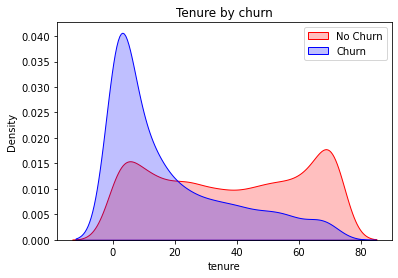

In [116]:
Mth = sns.kdeplot(df.tenure[(df["Churn"] == 0) ], color="Red", shade = True)
Mth = sns.kdeplot(df.tenure[(df["Churn"] == 1) ], ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('tenure')
Mth.set_title('Tenure by churn')

In [117]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [9]:
## lets try to group tenure values to understand a little bit better

df.loc[(df['tenure'] < 7),'TenureGroup'] = '0-6 (up to six months)'
df.loc[(df['tenure'] >=7) &(df['tenure'] < 13),'TenureGroup'] = '7-12 (6 months - 1 year)'
df.loc[(df['tenure'] >=13) & (df['tenure'] < 25),'TenureGroup'] = '13-24 (1-2 years)'
df.loc[(df['tenure'] >=25) & (df['tenure'] < 49),'TenureGroup'] = '25-48 (2-4 years)'
df.loc[(df['tenure'] >=49),'TenureGroup'] = '49+ (over 4 years)'

df.TenureGroup.head(10)

0      0-6 (up to six months)
1           25-48 (2-4 years)
2      0-6 (up to six months)
3           25-48 (2-4 years)
4      0-6 (up to six months)
5    7-12 (6 months - 1 year)
6           13-24 (1-2 years)
7    7-12 (6 months - 1 year)
8           25-48 (2-4 years)
9          49+ (over 4 years)
Name: TenureGroup, dtype: object

Now let's dive into different services and their impact on the client churn:

In [119]:
## there's strong connection between tenure and churn, when tenure is less then 1 year. First half of the year is very important
df.groupby('TenureGroup').agg({'Churn':['count', 'sum', 'mean']})

Churn               
                         count  sum      mean
TenureGroup                                  
0-6 (up to six months)    1481  784  0.529372
13-24 (1-2 years)         1024  294  0.287109
25-48 (2-4 years)         1594  325  0.203890
49+ (over 4 years)        2239  213  0.095132
7-12 (6 months - 1 year)   705  253  0.358865

* 12. Services.Company provides Phone services  and  Internet services.

In [10]:
## New Feature - Service Category

df['ServiceCategory'] = 'Phone&Internet'
df.loc[(df.PhoneService == 'Yes') & (df.InternetService == 'No'), 'ServiceCategory'] = 'Phone'
df.loc[(df.PhoneService == 'No') & ((df.InternetService == 'DSL') | (df.InternetService == 'Fiber optic')), 'ServiceCategory'] = 'Internet'
df.ServiceCategory.head(20)

0           Internet
1     Phone&Internet
2     Phone&Internet
3           Internet
4     Phone&Internet
5     Phone&Internet
6     Phone&Internet
7           Internet
8     Phone&Internet
9     Phone&Internet
10    Phone&Internet
11             Phone
12    Phone&Internet
13    Phone&Internet
14    Phone&Internet
15    Phone&Internet
16             Phone
17    Phone&Internet
18    Phone&Internet
19    Phone&Internet
Name: ServiceCategory, dtype: object

In [121]:
## Clients that have phone services churn less! Bundling works, its a greate way to increase charges and keep churn relatively low

df.groupby('ServiceCategory').agg({'Churn':['count', 'sum', 'mean']})

Churn                
                count   sum      mean
ServiceCategory                      
Internet          682   170  0.249267
Phone            1526   113  0.074050
Phone&Internet   4835  1586  0.328025

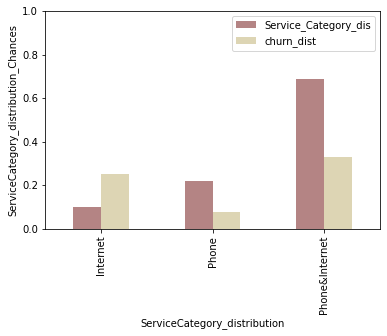

In [122]:
# What is the "pre_cancellation_qty" distribution?
ServiceCategory_distribution = df.ServiceCategory.value_counts(normalize=True).sort_index()
ServiceCategory_distribution_Chances = df.groupby('ServiceCategory').Churn.mean()

# Let's plot it all into one graph

Service_Category_stats = pd.DataFrame({'Service_Category_dis':ServiceCategory_distribution, 'churn_dist':ServiceCategory_distribution_Chances})

my_colors =['#b48484', '#ddd5b4' ]

Service_Category_stats.plot(kind='bar', color=my_colors)
plt.xlabel('ServiceCategory_distribution')
plt.ylabel('ServiceCategory_distribution_Chances')
plt.ylim(0, 1)
plt.title('');

In [11]:
##Grouped - Monthly charges by service category show that phone service is the cheapest one
byCategory = df.groupby('ServiceCategory')
byCategory['MonthlyCharges'].describe()

count       mean        std    min     25%     50%      75%  \
ServiceCategory                                                                 
Internet          682.0  42.028592  11.419585  23.45  33.600  40.575  50.7375   
Phone            1526.0  21.079194   2.164221  18.25  19.700  20.150  20.9000   
Phone&Internet   4835.0  81.755171  18.303085  42.90  69.775  82.500  95.7000   

                    max  
ServiceCategory          
Internet          67.20  
Phone             26.90  
Phone&Internet   118.75

In [12]:
## New Feature

df.loc[(df.PhoneService == 'No'), 'Phone Service New'] = 'No'
df.loc[(df.PhoneService == 'Yes') & (df.MultipleLines == 'Yes'), 'Phone Service New'] = 'MultipleLines'
df.loc[(df.PhoneService == 'Yes') & (df.MultipleLines == 'No'), 'Phone Service New'] = 'SingleLine'
df['Phone Service New'].head (20)


0                No
1        SingleLine
2        SingleLine
3                No
4        SingleLine
5     MultipleLines
6     MultipleLines
7                No
8     MultipleLines
9        SingleLine
10       SingleLine
11       SingleLine
12    MultipleLines
13    MultipleLines
14       SingleLine
15    MultipleLines
16       SingleLine
17    MultipleLines
18       SingleLine
19       SingleLine
Name: Phone Service New, dtype: object

In [125]:
## Phone + Multiple Phone Lines: Having multiple lines doesn't decrease churn, actually it increases it

df.groupby('Phone Service New').agg({'Churn':['count', 'sum', 'mean']})

Churn               
                  count  sum      mean
Phone Service New                     
MultipleLines      2971  850  0.286099
No                  682  170  0.249267
SingleLine         3390  849  0.250442

In [126]:
## Internet services: Online services and streaming
df.groupby('InternetService').agg({'Churn': ['count', 'sum', 'mean']})


Churn                
                count   sum      mean
InternetService                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

In [13]:
## Taking out "No internet service" and replacing it with "No"

df.OnlineSecurity = (df.OnlineSecurity=='Yes').astype('int')
df.OnlineBackup = (df.OnlineBackup=='Yes').astype('int')
df.DeviceProtection = (df.DeviceProtection=='Yes').astype('int')
df.TechSupport = (df.TechSupport=='Yes').astype('int')
df.StreamingTV = (df.StreamingTV=='Yes').astype('int')
df.StreamingMovies = (df.StreamingMovies=='Yes').astype('int')

df.head(20)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male              0      No         No      16          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   
16  8191-XWSZG  Female              0      No         No      52          Yes   
17  9959-WOFKT    Male              0      No        Yes      71          Yes   
18  4190-MFLUW  Female              0     Yes        Yes      10          Yes   
19  4183-MYFRB  Female              0      No         No      21          Yes   

       MultipleLines InternetService  OnlineSecurity  ...  \
0   No phone service             DSL               0  ...   
1                 No             DSL               1  ...   
2                 No             DSL               1  ...   
3   No phone service             DSL               1  ...   
4                 No     Fiber optic               0  ...   
5                Yes     Fiber optic               0  ...   
6                Yes     Fiber optic               0  ...   
7   No phone service             DSL               1  ...   
8                Yes     Fiber optic               0  ...   
9                 No             DSL               1  ...   
10                No             DSL               1  ...   
11                No              No               0  ...   
12               Yes     Fiber optic               0  ...   
13               Yes     Fiber optic               0  ...   
14                No     Fiber optic               1  ...   
15               Yes     Fiber optic               1  ...   
16                No              No               0  ...   
17               Yes     Fiber optic               1  ...   
18                No             DSL               0  ...   
19                No     Fiber optic               0  ...   

                PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0            Electronic check           29.85         29.85      0   
1                Mailed check           56.95        1889.5      0   
2                Mailed check           53.85        108.15      1   
3   Bank transfer (automatic)           42.30       1840.75      0   
4            Electronic check           70.70        151.65      1   
5            Electronic check           99.65         820.5      1   
6     Credit card (automatic)           89.10        1949.4      0   
7                Mailed check           29.75         301.9      0   
8            Electronic check          104.80       3046.05      1   
9   Bank transfer (automatic)           56.15       3487.95      0   
10               Mailed check           49.95        587.45      0   
11    Credit card (automatic)           18.95         326.8      0   
12    Credit card (automatic)          100.35        5681.1      0   
13  Bank transfer (automatic)          1

Check up on each internet sevice leads to dividing them to 2 groups: online services and streaming services

In [128]:
df.groupby('OnlineSecurity').agg({'Churn': ['count', 'sum', 'mean']})


Churn                
               count   sum      mean
OnlineSecurity                      
0               5024  1574  0.313296
1               2019   295  0.146112

In [129]:
df.groupby('OnlineBackup').agg({'Churn': ['count', 'sum', 'mean']})


Churn                
             count   sum      mean
OnlineBackup                      
0             4614  1346  0.291721
1             2429   523  0.215315

In [14]:
df['OnlineServices'] = 0
df.loc[(df.OnlineSecurity == 1)|(df.OnlineBackup == 1), 'OnlineServices'] = 1

df.groupby('OnlineServices').agg({'Churn':['count', 'sum', 'mean']})

Churn                
               count   sum      mean
OnlineServices                      
0               3721  1170  0.314432
1               3322   699  0.210415

In [131]:
df.groupby('DeviceProtection').agg({'Churn': ['count', 'sum', 'mean']})


Churn                
                 count   sum      mean
DeviceProtection                      
0                 4621  1324  0.286518
1                 2422   545  0.225021

In [132]:
df.groupby('TechSupport').agg({'Churn': ['count', 'sum', 'mean']})


Churn                
            count   sum      mean
TechSupport                      
0            4999  1559  0.311862
1            2044   310  0.151663

In [15]:
## new feature 'HasOnlineService'

df['HasOnlineServices']=0
df.loc[(df.OnlineSecurity == 1)|(df.OnlineBackup == 1)|(df.DeviceProtection == 1)|(df.TechSupport == 1), 'HasOnlineServices'] = 1
df.groupby('HasOnlineServices').agg({'Churn': ['count', 'sum', 'mean']})



Churn                
                  count   sum      mean
HasOnlineServices                      
0                  2793   831  0.297530
1                  4250  1038  0.244235

In [134]:
df.groupby('StreamingTV').agg({'Churn': ['count', 'sum', 'mean']})


Churn                
            count   sum      mean
StreamingTV                      
0            4336  1055  0.243312
1            2707   814  0.300702

In [135]:
df.groupby('StreamingMovies').agg({'Churn': ['count', 'sum', 'mean']})


Churn                
                count   sum      mean
StreamingMovies                      
0                4311  1051  0.243795
1                2732   818  0.299414

In [16]:
## new feature HasStreaming

df['HasStreaming']=0
df.loc[(df.StreamingTV ==1)|(df.StreamingMovies == 1), 'HasStreaming'] = 1
df.groupby('HasStreaming').agg({'Churn': ['count', 'sum', 'mean']})


Churn                
             count   sum      mean
HasStreaming                      
0             3544   808  0.227991
1             3499  1061  0.303229

In [137]:
df.groupby(['InternetService','OnlineSecurity']).agg({'Churn': ['count', 'sum', 'mean']})

Churn                
                               count   sum      mean
InternetService OnlineSecurity                      
DSL             0               1241   347  0.279613
                1               1180   112  0.094915
Fiber optic     0               2257  1114  0.493576
                1                839   183  0.218117
No              0               1526   113  0.074050

In [138]:
df.groupby(['InternetService','OnlineBackup']).agg({'Churn': ['count', 'sum', 'mean']})

Churn               
                             count  sum      mean
InternetService OnlineBackup                     
DSL             0             1335  343  0.256929
                1             1086  116  0.106814
Fiber optic     0             1753  890  0.507701
                1             1343  407  0.303053
No              0             1526  113  0.074050

In [139]:
df.groupby(['InternetService','OnlineServices']).agg({'Churn': ['count', 'sum', 'mean']})

Churn               
                               count  sum      mean
InternetService OnlineServices                     
DSL             0                792  274  0.345960
                1               1629  185  0.113567
Fiber optic     0               1403  783  0.558090
                1               1693  514  0.303603
No              0               1526  113  0.074050

In [140]:
df.groupby(['InternetService','DeviceProtection']).agg({'Churn': ['count', 'sum', 'mean']})

Churn               
                                 count  sum      mean
InternetService DeviceProtection                     
DSL             0                 1356  342  0.252212
                1                 1065  117  0.109859
Fiber optic     0                 1739  869  0.499712
                1                 1357  428  0.315402
No              0                 1526  113  0.074050

In [141]:
df.groupby(['InternetService','TechSupport']).agg({'Churn': ['count', 'sum', 'mean']})

Churn                
                            count   sum      mean
InternetService TechSupport                      
DSL             0            1243   345  0.277554
                1            1178   114  0.096774
Fiber optic     0            2230  1101  0.493722
                1             866   196  0.226328
No              0            1526   113  0.074050

In [142]:
df.groupby(['InternetService','HasStreaming']).agg({'Churn': ['count', 'sum', 'mean']})

Churn               
                             count  sum      mean
InternetService HasStreaming                     
DSL             0             1113  273  0.245283
                1             1308  186  0.142202
Fiber optic     0              905  422  0.466298
                1             2191  875  0.399361
No              0             1526  113  0.074050

In [143]:
df.groupby(['InternetService','StreamingTV']).agg({'Churn': ['count', 'sum', 'mean']})

Churn               
                            count  sum      mean
InternetService StreamingTV                     
DSL             0            1464  332  0.226776
                1             957  127  0.132706
Fiber optic     0            1346  610  0.453195
                1            1750  687  0.392571
No              0            1526  113  0.074050

In [144]:
df.groupby(['InternetService','StreamingMovies']).agg({'Churn': ['count', 'sum', 'mean']})

Churn               
                                count  sum      mean
InternetService StreamingMovies                     
DSL             0                1440  322  0.223611
                1                 981  137  0.139653
Fiber optic     0                1345  616  0.457993
                1                1751  681  0.388921
No              0                1526  113  0.074050

In [145]:
df.groupby(['InternetService','HasStreaming']).agg({'Churn': ['count', 'sum', 'mean']})

Churn               
                             count  sum      mean
InternetService HasStreaming                     
DSL             0             1113  273  0.245283
                1             1308  186  0.142202
Fiber optic     0              905  422  0.466298
                1             2191  875  0.399361
No              0             1526  113  0.074050

* 13. Charges.

Text(0.5, 1.0, 'monthlycharges Distribution of the customers')

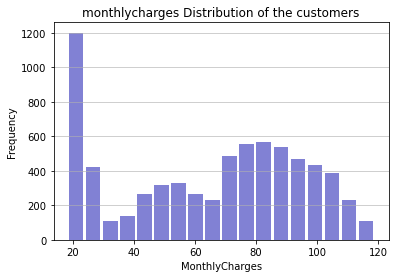

In [146]:
plt.hist(x=df['MonthlyCharges'].dropna(), bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.title('monthlycharges Distribution of the customers')

Text(0.5, 1.0, 'Monthly charges by churn')

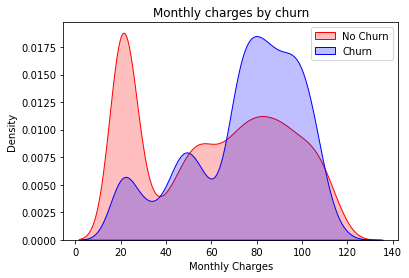

In [147]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ], color="Red", shade = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ], ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

#it is clear that the trend towards increased churn correlates with an increase in the price category of services


In [148]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [17]:
#TotalCharges is typed string. 
#we need to change the type to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [18]:
 #check null in "totalcharges"
    
df[df['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService  OnlineSecurity  ...  \
488            No  No phone service             DSL               1  ...   
753           Yes                No              No               0  ...   
936           Yes                No             DSL               1  ...   
1082          Yes               Yes              No               0  ...   
1340           No  No phone service             DSL               1  ...   
3331          Yes                No              No               0  ...   
3826          Yes               Yes              No               0  ...   
4380          Yes                No              No               0  ...   
5218          Yes                No              No               0  ...   
6670          Yes               Yes             DSL               0  ...   
6754          Yes               Yes             DSL               1  ...   

      Churn  SeniorCitzen_Partner  Individual  AutomaticPayment  \
488       0      NOT_SeniorCitzen           0                 1   
753       0      NOT_SeniorCitzen           0                 0   
936       0      NOT_SeniorCitzen           0                 0   
1082      0      NOT_SeniorCitzen           0                 0   
1340      0      NOT_SeniorCitzen           0                 1   
3331      0      NOT_SeniorCitzen           0                 0   
3826      0      NOT_SeniorCitzen           0                 0   
4380      0      NOT_SeniorCitzen           0                 0   
5218      0      NOT_SeniorCitzen           0                 0   
6670      0      NOT_SeniorCitzen           0                 0   
6754      0      NOT_SeniorCitzen           0                 1   

                 TenureGroup ServiceCategory Phone Service New OnlineServices  \
488   0-6 (up to six months)        Internet                No              1   
753   0-6 (up to six months)           Phone        SingleLine              0   
936   0-6 (up to six months)  Phone&Internet        SingleLine              1   
1082  0-6 (up to six months)           Phone     MultipleLines              0   
1340  0-6 (up to six months)        Internet                No              1   
3331  0-6 (up to six months)           Phone        SingleLine              0   
3826  0-6 (up to six months)           Phone     MultipleLines              0   
4380  0-6 (up to six months)           Phone        SingleLine              0   
5218  0-6 (up to six months)           Phone        SingleLine              0   
6670  0-6 (up to six months)  Phone&Internet     MultipleLines              1   
6754  0-6 (up to six months)  Phone&Internet     MultipleLines              1   

      HasOnlineServices  HasStreaming  
488                   1             1  
753                   0             0  
936                   1             1  
1082                  0             0  
1340                  1             1  
3331                  0             0  
3826                  0             0  
4380                  0             0  
5218                  0             0  
6670                  1             1  
6754                  1           

In [151]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [19]:
#remove rows with null
df = df.dropna()

In [20]:
 #check null in "totalcharges"
    
df[df['TotalCharges'].isnull()]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, SeniorCitzen_Partner, Individual, AutomaticPayment, TenureGroup, ServiceCategory, Phone Service New, OnlineServices, HasOnlineServices, HasStreaming]
Index: []

[0 rows x 30 columns]

Text(0.5, 1.0, 'Total charges by churn')

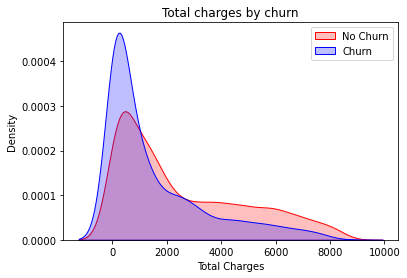

In [154]:
Tch = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ], color="Red", shade = True)
Tch = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ], ax =Tch, color="Blue", shade= True)
Tch.legend(["No Churn","Churn"],loc='upper right')
Tch.set_ylabel('Density')
Tch.set_xlabel('Total Charges')
Tch.set_title('Total charges by churn')

#as we can see more churn is there with lower charges


# Let's see the impact of each factor on churn

C:\Users\MI\AppData\Local\Temp\ipykernel_17232\1064498478.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


<Figure size 432x288 with 0 Axes>

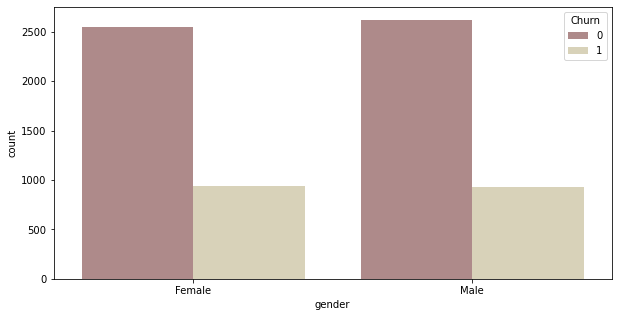

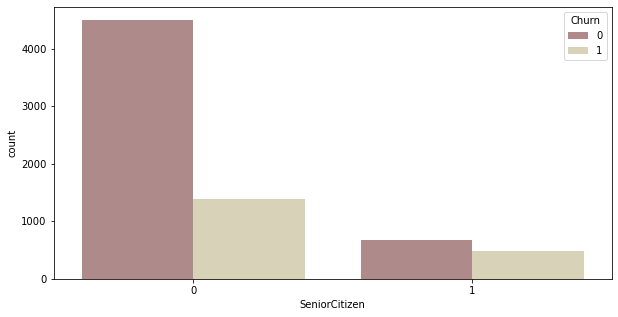

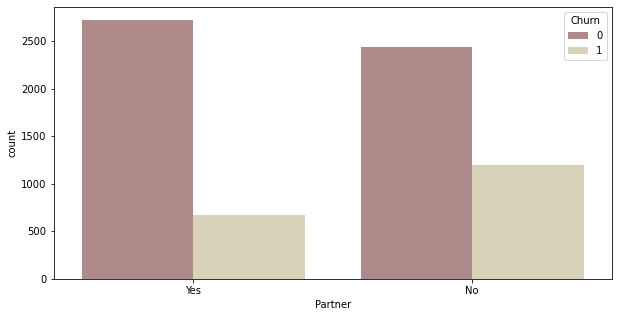

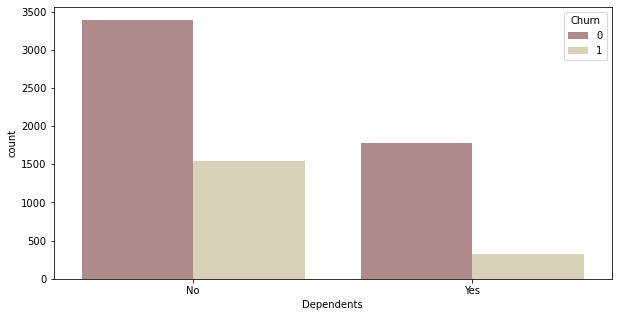

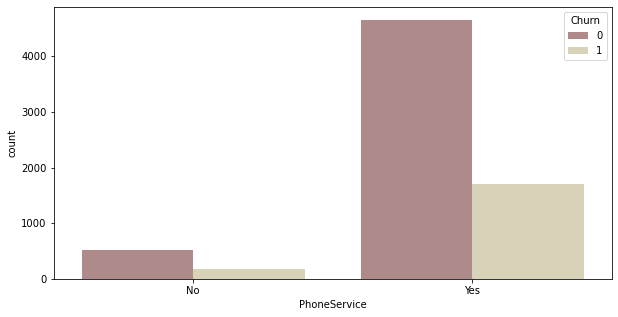

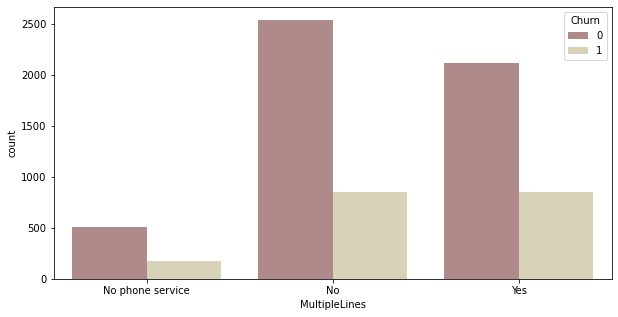

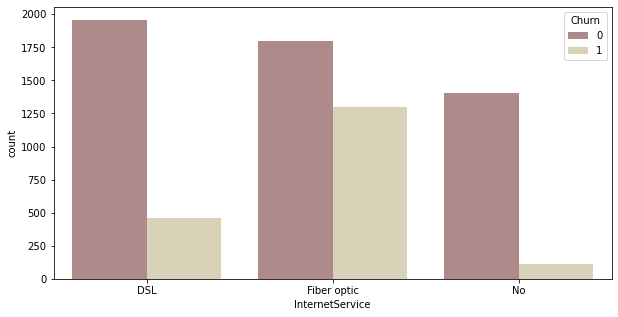

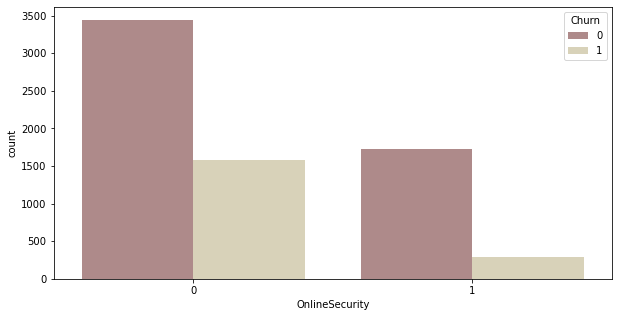

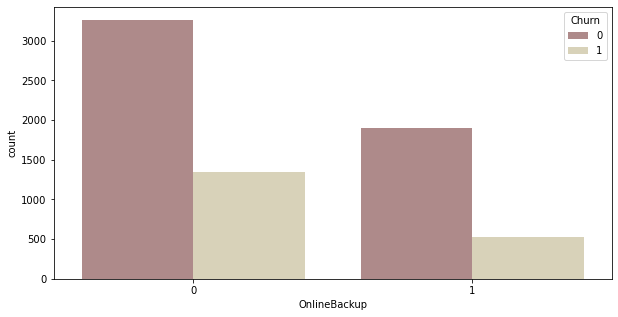

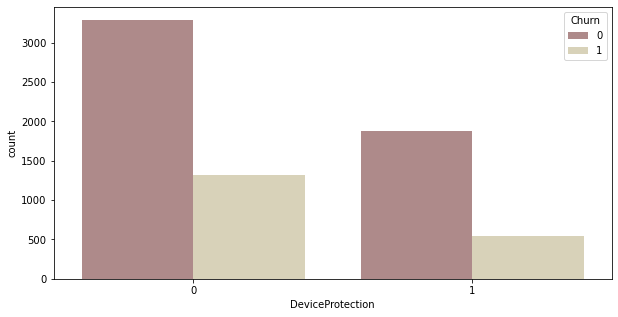

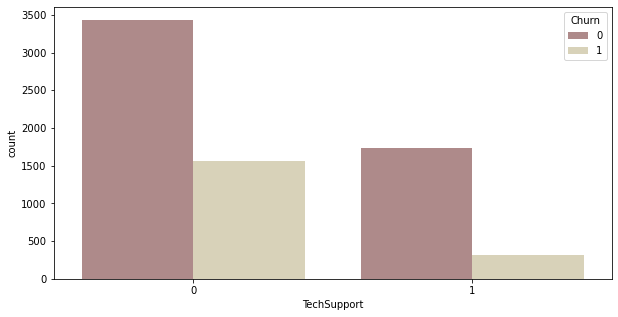

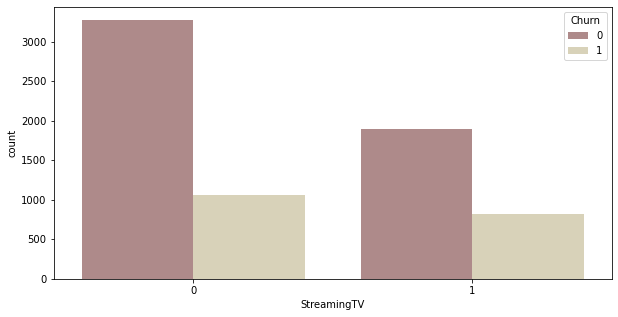

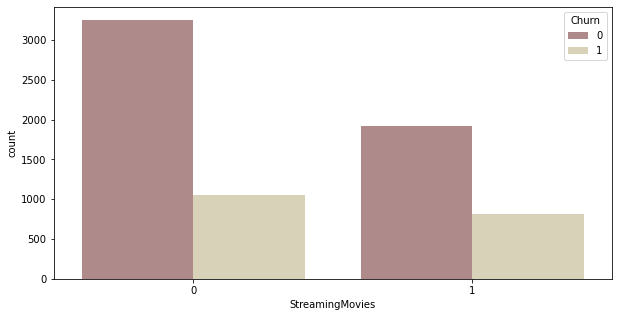

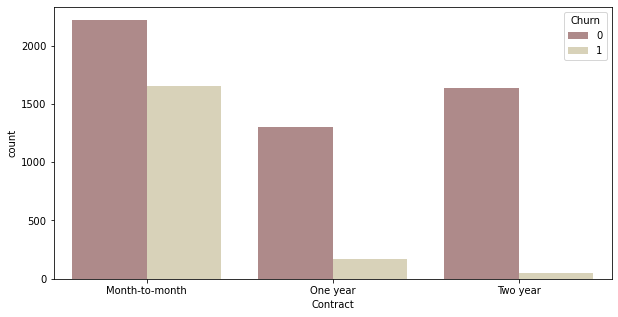

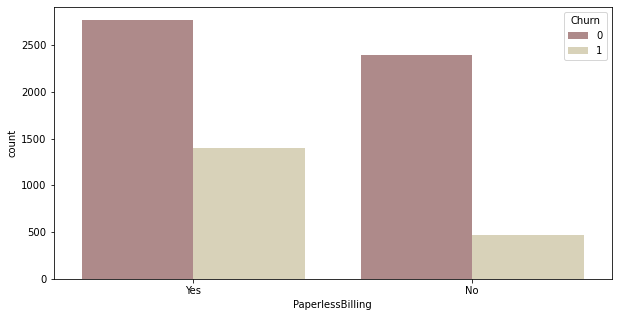

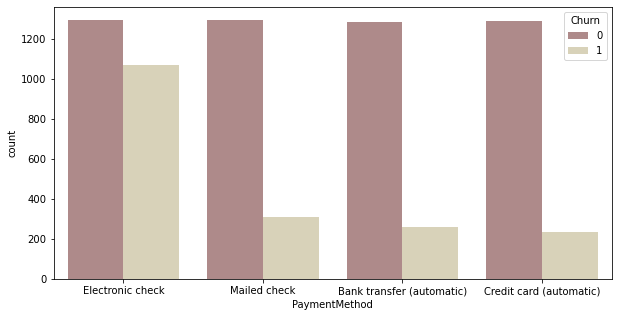

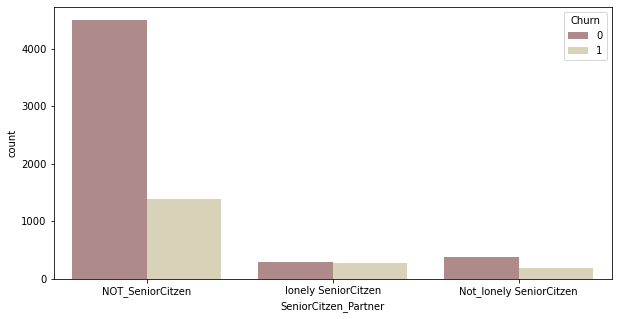

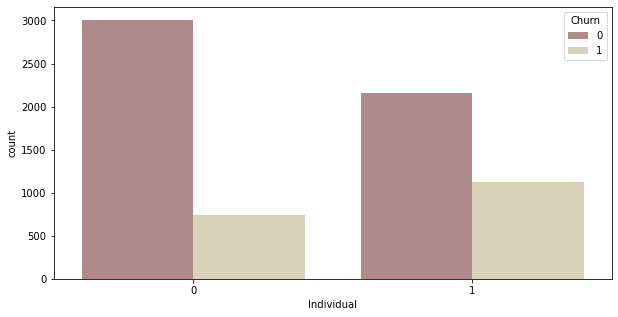

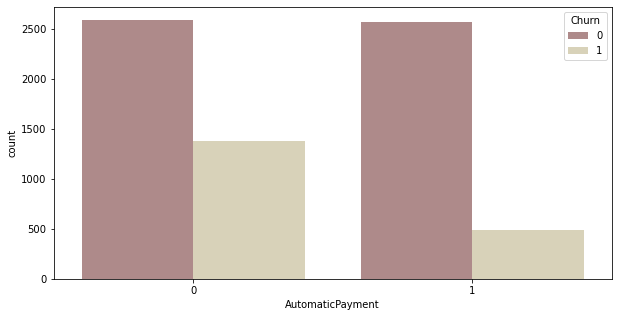

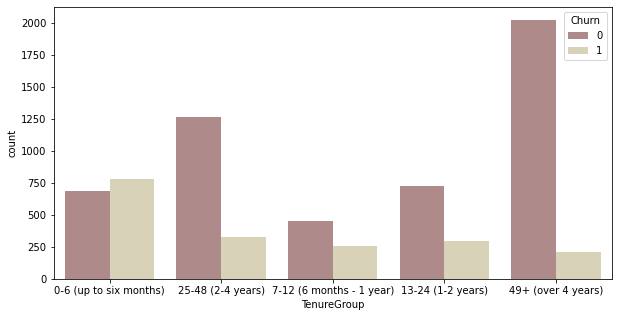

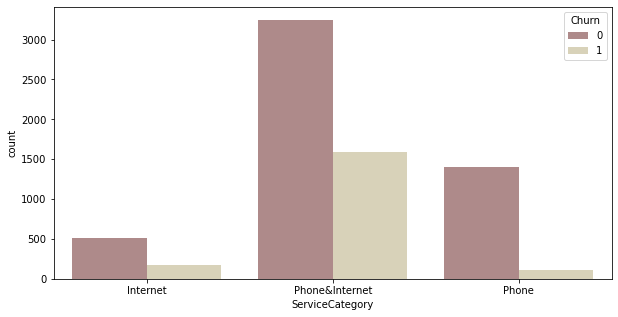

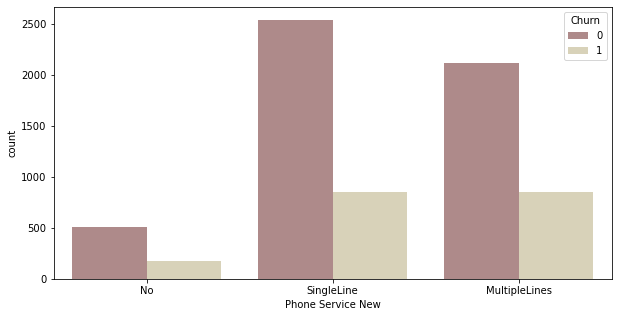

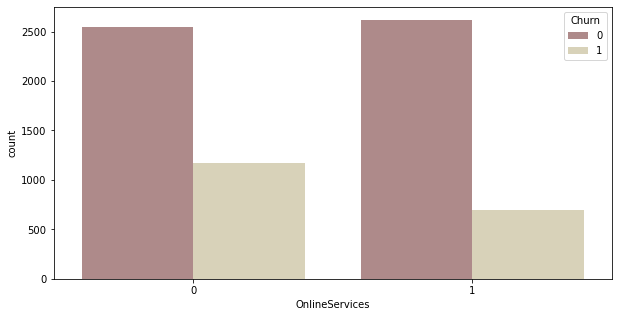

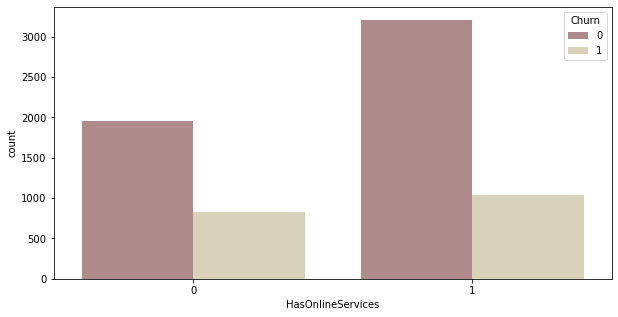

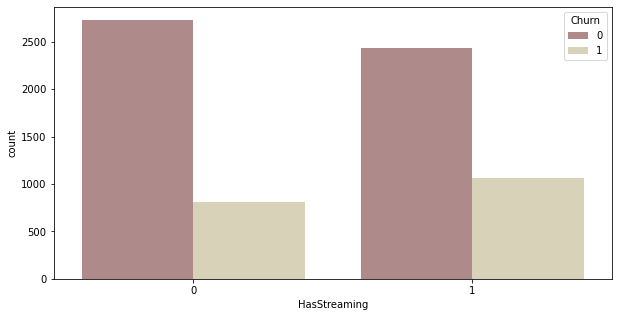

In [21]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure', 'customerID'])):
    plt.figure(i)
    plt.figure(figsize=(10,5))
    my_colors =['#b48484', '#ddd5b4' ]
    sns.countplot(data=df, x=predictor, hue ='Churn', palette= my_colors)
    

# Step 2 - Data Cleaning


In [22]:
df_new = df.rename(columns=str.lower)
df_new.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'seniorcitzen_partner', 'individual', 'automaticpayment', 'tenuregroup',
       'servicecategory', 'phone service new', 'onlineservices',
       'hasonlineservices', 'hasstreaming'],
      dtype='object')

In [23]:
df_new

customerid  gender  seniorcitizen partner dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     phoneservice     multiplelines internetservice  onlinesecurity  ...  \
0              No  No phone service             DSL               0  ...   
1             Yes                No             DSL               1  ...   
2             Yes                No             DSL               1  ...   
3              No  No phone service             DSL               1  ...   
4             Yes                No     Fiber optic               0  ...   
...           ...               ...             ...             ...  ...   
7038          Yes               Yes             DSL               1  ...   
7039          Yes               Yes     Fiber optic               0  ...   
7040           No  No phone service             DSL               1  ...   
7041          Yes               Yes     Fiber optic               0  ...   
7042          Yes                No     Fiber optic               1  ...   

      churn     seniorcitzen_partner  individual  automaticpayment  \
0         0         NOT_SeniorCitzen           0                 0   
1         0         NOT_SeniorCitzen           1                 0   
2         1         NOT_SeniorCitzen           1                 0   
3         0         NOT_SeniorCitzen           1                 1   
4         1         NOT_SeniorCitzen           1                 0   
...     ...                      ...         ...               ...   
7038      0         NOT_SeniorCitzen           0                 0   
7039      0         NOT_SeniorCitzen           0                 1   
7040      0         NOT_SeniorCitzen           0                 0   
7041      1  Not_lonely SeniorCitzen           0                 0   
7042      0         NOT_SeniorCitzen           1                 1   

                   tenuregroup servicecategory phone service new  \
0       0-6 (up to six months)        Internet                No   
1            25-48 (2-4 years)  Phone&Internet        SingleLine   
2       0-6 (up to six months)  Phone&Internet        SingleLine   
3            25-48 (2-4 years)        Internet                No   
4       0-6 (up to six months)  Phone&Internet        SingleLine   
...                        ...             ...               ...   
7038         13-24 (1-2 years)  Phone&Internet     MultipleLines   
7039        49+ (over 4 years)  Phone&Internet     MultipleLines   
7040  7-12 (6 months - 1 year)        Internet                No   
7041    0-6 (up to six months)  Phone&Internet     MultipleLines   
7042        49+ (over 4 years)  Phone&Internet        SingleLine   

     onlineservices  hasonlineservices  hasstreaming  
0                 1                  1             0  
1                 1                  1             0  
2                 1                  1             0  
3                 1                  1             0  
4                 0                  0             0  
...             ...                ...           ...  
7038              1                  1             1  
7039              1                  1             1  
7040              1                  1             0  
7041              0                  0      

In [24]:
df_new.dtypes

customerid               object
gender                   object
seniorcitizen             int64
partner                  object
dependents               object
tenure                    int64
phoneservice             object
multiplelines            object
internetservice          object
onlinesecurity            int32
onlinebackup              int32
deviceprotection          int32
techsupport               int32
streamingtv               int32
streamingmovies           int32
contract                 object
paperlessbilling         object
paymentmethod            object
monthlycharges          float64
totalcharges            float64
churn                     int32
seniorcitzen_partner     object
individual                int64
automaticpayment          int64
tenuregroup              object
servicecategory          object
phone service new        object
onlineservices            int64
hasonlineservices         int64
hasstreaming              int64
dtype: object

In [25]:

df_new['gender'] = df_new['gender'].map({"Male": 1, "Female": 0}).astype(int)
df_new.partner = (df_new.partner=='Yes').astype('int')
df_new['dependents'] = df_new['dependents'].map({"Yes": 1, "No": 0}).astype(int)
df_new['phoneservice'] = df_new['phoneservice'].map({"Yes": 1, "No": 0}).astype(int)
df_new['paperlessbilling'] = df_new['paperlessbilling'].map({"Yes": 1, "No": 0}).astype(int)


In [26]:
df_new = df_new.drop(['customerid'], axis=1)


In [27]:
df_new.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'seniorcitzen_partner',
       'individual', 'automaticpayment', 'tenuregroup', 'servicecategory',
       'phone service new', 'onlineservices', 'hasonlineservices',
       'hasstreaming'],
      dtype='object')

In [28]:
df_new=df_new[[ 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'seniorcitzen_partner',
       'individual', 'automaticpayment', 'tenuregroup', 'servicecategory',
       'phone service new', 'onlineservices', 'hasonlineservices',
       'hasstreaming']]

In [29]:
df_new.dtypes

churn                     int32
gender                    int32
seniorcitizen             int64
partner                   int32
dependents                int32
tenure                    int64
phoneservice              int32
multiplelines            object
internetservice          object
onlinesecurity            int32
onlinebackup              int32
deviceprotection          int32
techsupport               int32
streamingtv               int32
streamingmovies           int32
contract                 object
paperlessbilling          int32
paymentmethod            object
monthlycharges          float64
totalcharges            float64
seniorcitzen_partner     object
individual                int64
automaticpayment          int64
tenuregroup              object
servicecategory          object
phone service new        object
onlineservices            int64
hasonlineservices         int64
hasstreaming              int64
dtype: object

In [30]:
df_new = pd.get_dummies(df_new) # Categorical values to 1-hot ("one hot" encoding is a representation of categorical variables as binary vectors)
df_new

churn  gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
0         0       0              0        1           0       1             0   
1         0       1              0        0           0      34             1   
2         1       1              0        0           0       2             1   
3         0       1              0        0           0      45             0   
4         1       0              0        0           0       2             1   
...     ...     ...            ...      ...         ...     ...           ...   
7038      0       1              0        1           1      24             1   
7039      0       0              0        1           1      72             1   
7040      0       0              0        1           1      11             0   
7041      1       1              1        1           0       4             1   
7042      0       1              0        0           0      66             1   

      onlinesecurity  onlinebackup  deviceprotection  ...  \
0                  0             1                 0  ...   
1                  1             0                 1  ...   
2                  1             1                 0  ...   
3                  1             0                 1  ...   
4                  0             0                 0  ...   
...              ...           ...               ...  ...   
7038               1             0                 1  ...   
7039               0             1                 1  ...   
7040               1             0                 0  ...   
7041               0             0                 0  ...   
7042               1             0                 1  ...   

      tenuregroup_13-24 (1-2 years)  tenuregroup_25-48 (2-4 years)  \
0                                 0                              0   
1                                 0                              1   
2                                 0                              0   
3                                 0                              1   
4                                 0                              0   
...                             ...                            ...   
7038                              1                              0   
7039                              0                              0   
7040                              0                              0   
7041                              0                              0   
7042                              0                              0   

      tenuregroup_49+ (over 4 years)  tenuregroup_7-12 (6 months - 1 year)  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   
...                              ...                                   ...   
7038                               0                                     0   
7039                               1                                     0   
7040                               0                                     1   
7041                               0                                     0   
7042                               1                                     0   

      servicecategory_Internet  servicecategory_Phone  \
0                            1                      0   
1                            0                      0   
2                            0                      0   
3                            1                      0   
4                            0                      0   
...                        ...                    ...   
7038                         0                      0   
7039                         0                      0   
7040     

In [31]:
# Let's convert all data to float because some modules warn against other types
df_new = df_new.astype(float)

In [32]:
df_new.describe()

churn       gender  seniorcitizen      partner   dependents  \
count  7032.000000  7032.000000    7032.000000  7032.000000  7032.000000   
mean      0.265785     0.504693       0.162400     0.482509     0.298493   
std       0.441782     0.500014       0.368844     0.499729     0.457629   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  phoneservice  onlinesecurity  onlinebackup  \
count  7032.000000   7032.000000     7032.000000   7032.000000   
mean     32.421786      0.903299        0.286547      0.344852   
std      24.545260      0.295571        0.452180      0.475354   
min       1.000000      0.000000        0.000000      0.000000   
25%       9.000000      1.000000        0.000000      0.000000   
50%      29.000000      1.000000        0.000000      0.000000   
75%      55.000000      1.000000        1.000000      1.000000   
max      72.000000      1.000000        1.000000      1.000000   

       deviceprotection  ...  tenuregroup_13-24 (1-2 years)  \
count       7032.000000  ...                     7032.00000   
mean           0.343857  ...                        0.14562   
std            0.475028  ...                        0.35275   
min            0.000000  ...                        0.00000   
25%            0.000000  ...                        0.00000   
50%            0.000000  ...                        0.00000   
75%            1.000000  ...                        0.00000   
max            1.000000  ...                        1.00000   

       tenuregroup_25-48 (2-4 years)  tenuregroup_49+ (over 4 years)  \
count                    7032.000000                     7032.000000   
mean                        0.226678                        0.318402   
std                         0.418712                        0.465889   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         0.000000                        1.000000   
max                         1.000000                        1.000000   

       tenuregroup_7-12 (6 months - 1 year)  servicecategory_Internet  \
count                           7032.000000               7032.000000   
mean                               0.100256                  0.096701   
std                                0.300362                  0.295571   
min                                0.000000                  0.000000   
25%                                0.000000                  0.000000   
50%                                0.000000                  0.000000   
75%                                0.000000                  0.000000   
max                                1.000000                  1.000000   

       servicecategory_Phone  servicecategory_Phone&Internet  \
count            7032.000000                     7032.000000   
mean                0.216155                        0.687144   
std                 0.411650                        0.463689   
min                 0.000000                        0.000000   
25%                 0.000000                        0.000000   
50%                 0.000000                        1.000000   
75%                 0.000000                        1.000000   
max                 1.000000                        1.000000   

       phone service new_MultipleLines  phone service new_No  \
count                      7032.000000           7032.000000   
mean                          0.421928              0.096701   
std                           0.493902              0.295571   
min                      

In [33]:
df_new.corr()

churn    gender  \
churn                                         1.000000 -0.008545   
gender                                       -0.008545  1.000000   
seniorcitizen                                 0.150541 -0.001819   
partner                                      -0.149982 -0.001379   
dependents                                   -0.163128  0.010349   
tenure                                       -0.354049  0.005285   
phoneservice                                  0.011691 -0.007515   
onlinesecurity                               -0.171270 -0.016328   
onlinebackup                                 -0.082307 -0.013093   
deviceprotection                             -0.066193 -0.000807   
techsupport                                  -0.164716 -0.008507   
streamingtv                                   0.063254 -0.007124   
streamingmovies                               0.060860 -0.010105   
paperlessbilling                              0.191454 -0.011902   
monthlycharges                                0.192858 -0.013779   
totalcharges                                 -0.199484  0.000048   
individual                                    0.162113 -0.017328   
automaticpayment                             -0.210420 -0.011974   
onlineservices                               -0.117759 -0.017131   
hasonlineservices                            -0.059402 -0.010130   
hasstreaming                                  0.085040 -0.009046   
multiplelines_No                             -0.032654  0.004335   
multiplelines_No phone service               -0.011691  0.007515   
multiplelines_Yes                             0.040033 -0.008883   
internetservice_DSL                          -0.124141  0.007584   
internetservice_Fiber optic                   0.307463 -0.011189   
internetservice_No                           -0.227578  0.004745   
contract_Month-to-month                       0.404565 -0.003251   
contract_One year                            -0.178225  0.007755   
contract_Two year                            -0.301552 -0.003603   
paymentmethod_Bank transfer (automatic)      -0.118136 -0.015973   
paymentmethod_Credit card (automatic)        -0.134687  0.001632   
paymentmethod_Electronic check                0.301455  0.000844   
paymentmethod_Mailed check                   -0.090773  0.013199   
seniorcitzen_partner_NOT_SeniorCitzen        -0.150541  0.001819   
seniorcitzen_partner_Not_lonely SeniorCitzen  0.053781  0.037231   
seniorcitzen_partner_lonely SeniorCitzen      0.149644 -0.039811   
tenuregroup_0-6 (up to six months)            0.311364 -0.001328   
tenuregroup_13-24 (1-2 years)                 0.019929 -0.000649   
tenuregroup_25-48 (2-4 years)                -0.075859 -0.010516   
tenuregroup_49+ (over 4 years)               -0.264035  0.010985   
tenuregroup_7-12 (6 months - 1 year)          0.070336  0.000181   
servicecategory_Internet                     -0.011691  0.007515   
servicecategory_Phone                        -0.227578  0.004745   
servicecategory_Phone&Internet                0.209490 -0.009003   
phone service new_MultipleLines               0.040033 -0.008883   
phone service new_No                         -0.011691  0.007515   
phone service new_SingleLine                 -0.032654  0.004335   

                                              seniorcitizen   partner  \
churn                                              0.150541 -0.149982   
gender                                            -0.001819 -0.001379   
seniorcitizen                                      1.000000  0.016957   
partner                                            0.016957  1.000000   
dependents                                        -0.210550  0.452269   
tenure                                             0.015683  0.381912   
phoneservice                                       0.008392  0.018397   
onlinesecurity                                    -0.038576  0.143346   
onlinebackup                                       0.066663

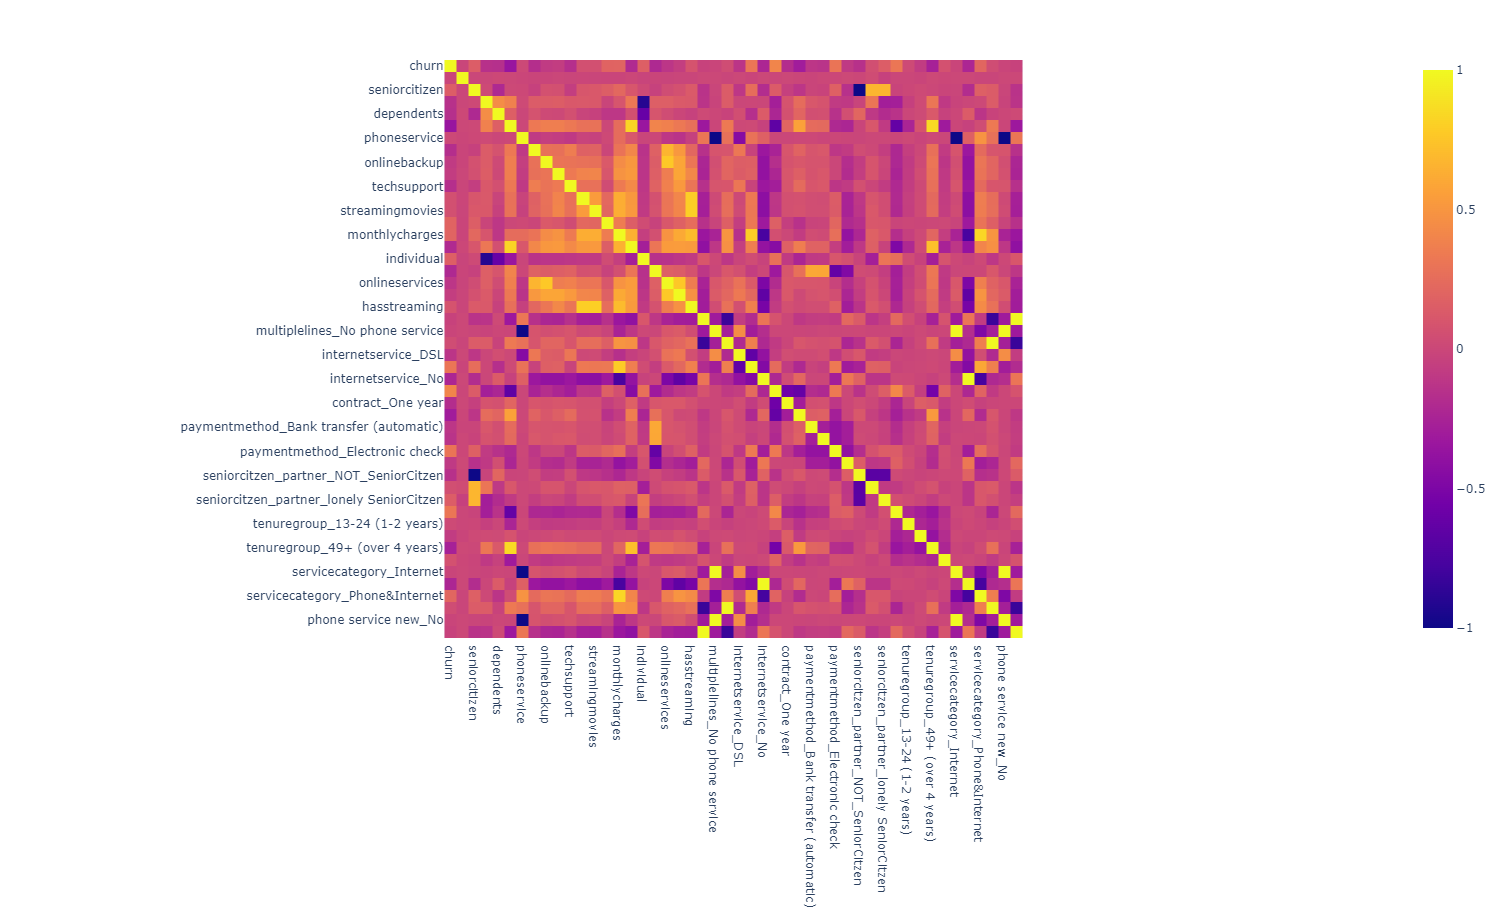

In [34]:
# Correlation matrix to heat map
import plotly.express as px
corr = df_new.corr()


    
fig = px.imshow(corr,width=970, height=920)
fig.show()


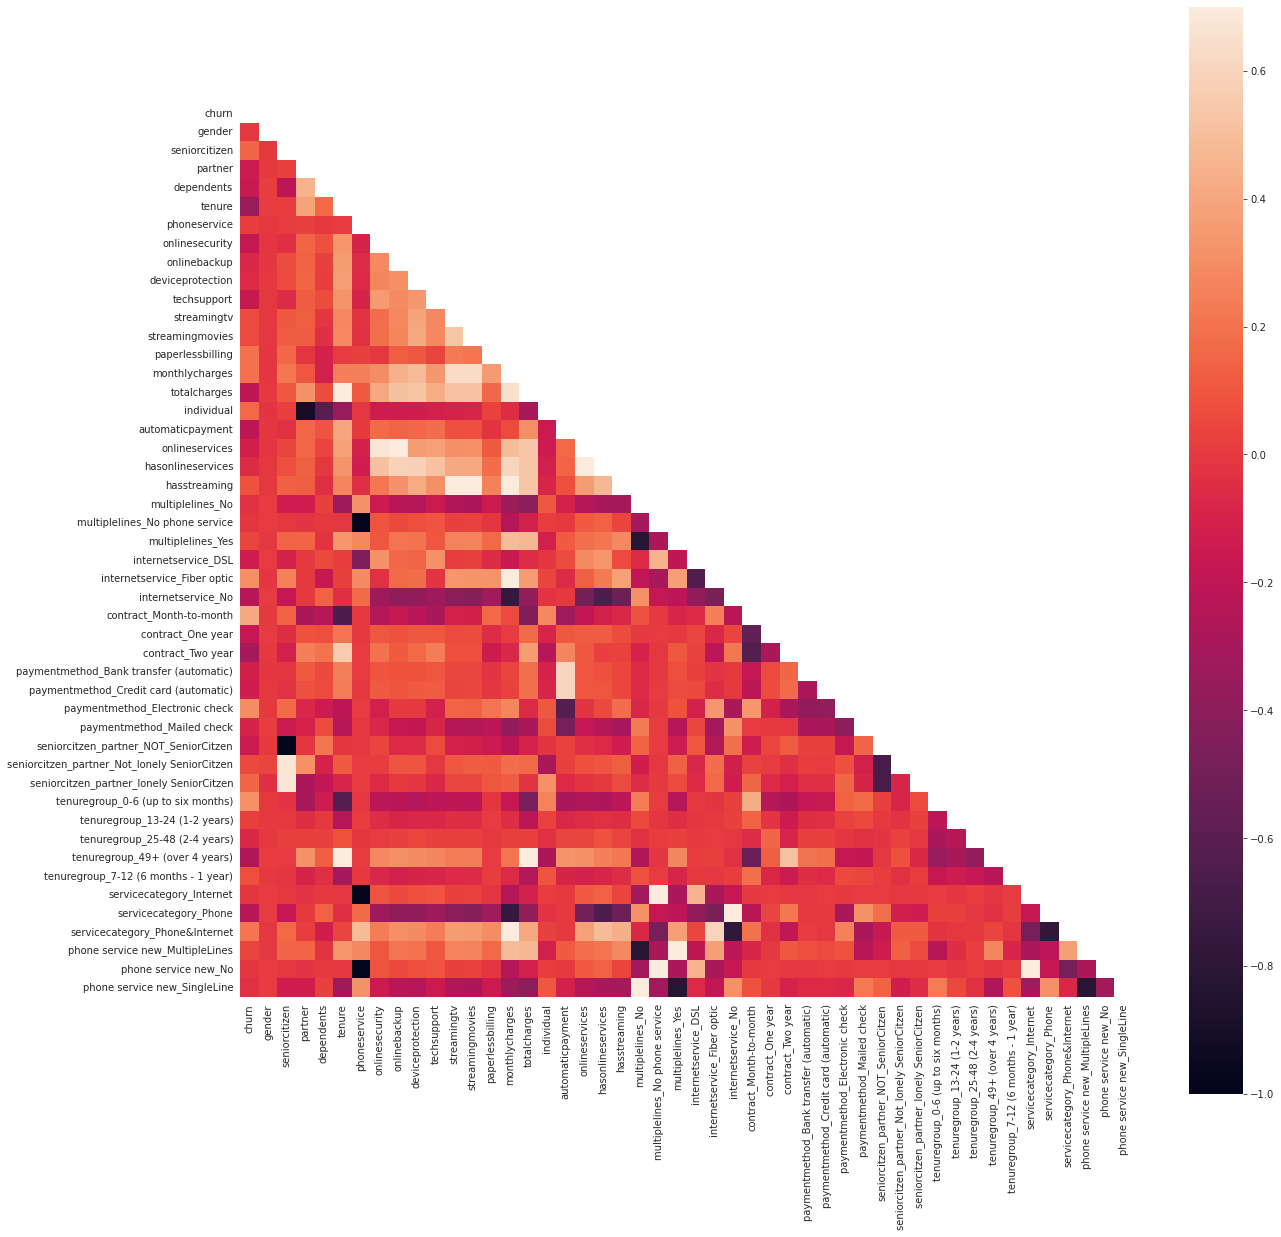

In [45]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, vmax=.7, square=True)
 

# Step 3 - Machine Learning


### We only have 7043 examples, let's use 1410 for test and the rest for train and split to inputs and labels
#### We'll use Scikit-Learn library
<br>

In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_new, test_size=1410, random_state=0, shuffle=True)

label = 'churn'

x_train = train.drop(label, axis=1)
y_train = train[label]


x_test = test.drop(label, axis=1)
y_test = test[label]

In [178]:
train

churn  gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
5074    0.0     0.0            0.0      0.0         1.0    49.0           1.0   
156     0.0     0.0            0.0      0.0         0.0    22.0           1.0   
2390    0.0     0.0            0.0      1.0         1.0     8.0           1.0   
5878    0.0     1.0            0.0      0.0         0.0     3.0           1.0   
942     0.0     1.0            0.0      0.0         0.0    24.0           1.0   
...     ...     ...            ...      ...         ...     ...           ...   
4939    0.0     1.0            0.0      0.0         0.0     1.0           1.0   
3269    0.0     1.0            0.0      0.0         0.0    65.0           1.0   
1658    1.0     1.0            0.0      1.0         1.0    50.0           1.0   
2612    0.0     0.0            0.0      1.0         1.0    14.0           1.0   
2737    0.0     1.0            0.0      0.0         0.0    64.0           1.0   

      onlinesecurity  onlinebackup  deviceprotection  ...  \
5074             0.0           0.0               0.0  ...   
156              0.0           0.0               0.0  ...   
2390             0.0           0.0               0.0  ...   
5878             0.0           0.0               0.0  ...   
942              0.0           0.0               0.0  ...   
...              ...           ...               ...  ...   
4939             0.0           0.0               0.0  ...   
3269             0.0           0.0               0.0  ...   
1658             1.0           0.0               1.0  ...   
2612             0.0           1.0               0.0  ...   
2737             0.0           0.0               1.0  ...   

      tenuregroup_13-24 (1-2 years)  tenuregroup_25-48 (2-4 years)  \
5074                            0.0                            0.0   
156                             1.0                            0.0   
2390                            0.0                            0.0   
5878                            0.0                            0.0   
942                             1.0                            0.0   
...                             ...                            ...   
4939                            0.0                            0.0   
3269                            0.0                            0.0   
1658                            0.0                            0.0   
2612                            1.0                            0.0   
2737                            0.0                            0.0   

      tenuregroup_49+ (over 4 years)  tenuregroup_7-12 (6 months - 1 year)  \
5074                             1.0                                   0.0   
156                              0.0                                   0.0   
2390                             0.0                                   1.0   
5878                             0.0                                   0.0   
942                              0.0                                   0.0   
...                              ...                                   ...   
4939                             0.0                                   0.0   
3269                             1.0                                   0.0   
1658                             1.0                                   0.0   
2612                             0.0                                   0.0   
2737                             1.0                                   0.0   

      servicecategory_Internet  servicecategory_Phone  \
5074                       0.0                    1.0   
156                        0.0                    0.0   
2390                       0.0                    1.0   
5878                       0.0                    1.0   
942                        0.0                    0.0   
...                        ...                    ...   
4939                       0.0                    1.0   
3269                       0.0                    1.0   
1658     

In [179]:
test

churn  gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
5561    0.0     1.0            0.0      0.0         0.0     1.0           1.0   
5814    0.0     1.0            0.0      0.0         0.0    16.0           1.0   
2645    0.0     0.0            0.0      0.0         0.0     1.0           1.0   
3983    1.0     1.0            0.0      0.0         0.0     1.0           0.0   
6438    1.0     1.0            1.0      0.0         0.0     1.0           1.0   
...     ...     ...            ...      ...         ...     ...           ...   
2766    0.0     0.0            0.0      1.0         0.0    64.0           1.0   
2918    0.0     1.0            1.0      1.0         0.0     8.0           0.0   
2964    0.0     1.0            0.0      1.0         0.0    24.0           1.0   
5113    0.0     0.0            0.0      1.0         1.0    71.0           1.0   
5363    0.0     1.0            0.0      1.0         1.0    70.0           1.0   

      onlinesecurity  onlinebackup  deviceprotection  ...  \
5561             0.0           0.0               0.0  ...   
5814             0.0           0.0               0.0  ...   
2645             0.0           0.0               0.0  ...   
3983             0.0           0.0               0.0  ...   
6438             0.0           0.0               0.0  ...   
...              ...           ...               ...  ...   
2766             1.0           1.0               1.0  ...   
2918             0.0           1.0               1.0  ...   
2964             1.0           0.0               0.0  ...   
5113             1.0           1.0               1.0  ...   
5363             0.0           0.0               0.0  ...   

      tenuregroup_13-24 (1-2 years)  tenuregroup_25-48 (2-4 years)  \
5561                            0.0                            0.0   
5814                            1.0                            0.0   
2645                            0.0                            0.0   
3983                            0.0                            0.0   
6438                            0.0                            0.0   
...                             ...                            ...   
2766                            0.0                            0.0   
2918                            0.0                            0.0   
2964                            1.0                            0.0   
5113                            0.0                            0.0   
5363                            0.0                            0.0   

      tenuregroup_49+ (over 4 years)  tenuregroup_7-12 (6 months - 1 year)  \
5561                             0.0                                   0.0   
5814                             0.0                                   0.0   
2645                             0.0                                   0.0   
3983                             0.0                                   0.0   
6438                             0.0                                   0.0   
...                              ...                                   ...   
2766                             1.0                                   0.0   
2918                             0.0                                   1.0   
2964                             0.0                                   0.0   
5113                             1.0                                   0.0   
5363                             1.0                                   0.0   

      servicecategory_Internet  servicecategory_Phone  \
5561                       0.0                    1.0   
5814                       0.0                    1.0   
2645                       0.0                    1.0   
3983                       1.0                    0.0   
6438                       0.0                    0.0   
...                        ...                    ...   
2766                       0.0                    0.0   
2918                       1.0                    0.0   
2964     

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5622, 47), (5622,), (1410, 47), (1410,))

# Decision Tree

>1, train: 0.733, test: 0.738
>2, train: 0.761, test: 0.765
>3, train: 0.791, test: 0.789
>4, train: 0.792, test: 0.792
>5, train: 0.803, test: 0.789
>6, train: 0.813, test: 0.781
>7, train: 0.825, test: 0.779
>8, train: 0.843, test: 0.767
>9, train: 0.859, test: 0.765
>10, train: 0.881, test: 0.745
>11, train: 0.904, test: 0.747
>12, train: 0.927, test: 0.733
>13, train: 0.948, test: 0.715
>14, train: 0.962, test: 0.715
>15, train: 0.973, test: 0.726
>16, train: 0.980, test: 0.714
>17, train: 0.988, test: 0.717
>18, train: 0.991, test: 0.716
>19, train: 0.994, test: 0.723
>20, train: 0.996, test: 0.717


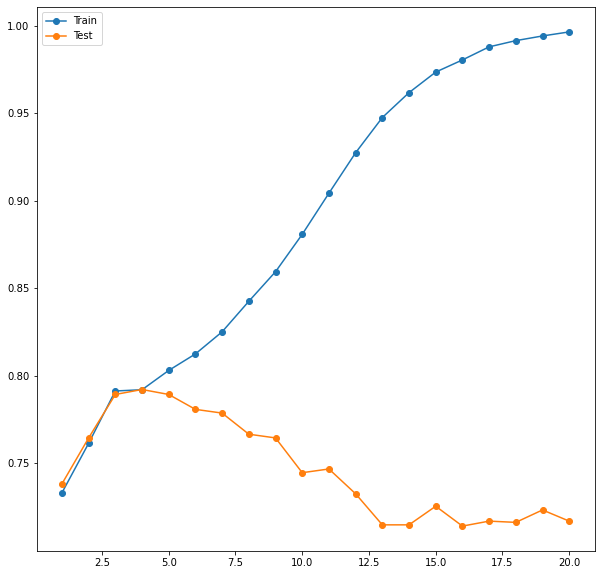

In [39]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

# define lists to collect scores
train_scores, test_scores = list(), list()
...
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
...
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
...
# plot of train and test scores vs tree depth
plt.figure(figsize = (10,10))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


In [46]:


clf = DecisionTreeClassifier(max_depth=4)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

# Evaluation for Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
print('Decision Tree Accuracy is:')
test_acc


Decision Tree Accuracy is:


0.7921985815602837

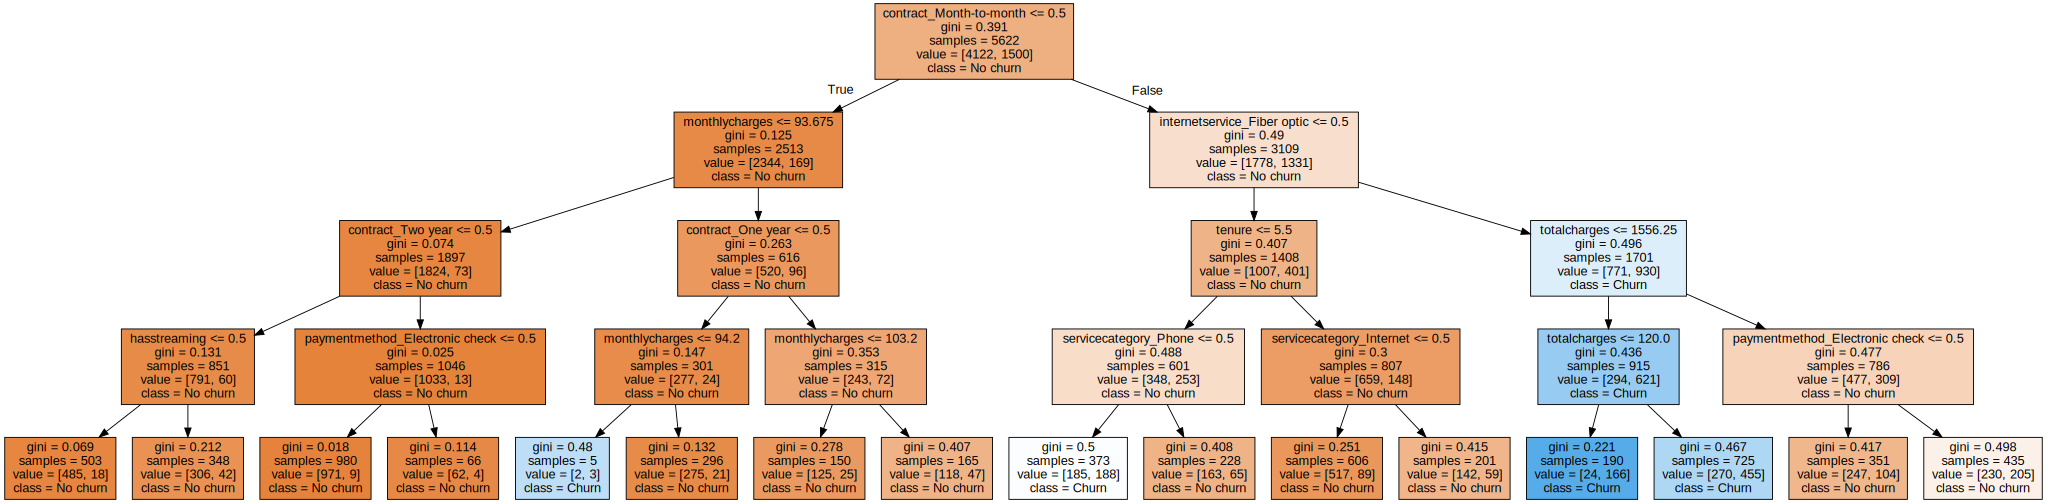

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# this is afunction that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))
    graph.format = 'png'
    graph.render('dtree_render',view=True)
    
# Using the function above, with the 3 arg
    # tree
    # feaures
    # labels --> we'll go over the example and it will be clear
    



plot_tree(clf, x_train.columns, ['No churn', 'Churn'])


# Random Forest model

In [47]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

# define lists to collect scores
train_scores, test_scores = list(), list()
...
# define the tree depths to evaluate
values = [i for i in range(1, 10)]
values_estimators = [j for j in range(1, 21)]
...
# evaluate a decision tree for each depth



K_list = []
k=0
for j in values_estimators:

    for i in values:
        
        k +=1
        K_list.append(k)
        # configure the model
        model = RandomForestClassifier(n_estimators=j, max_depth=i)
        # fit model on the training dataset
        model.fit(x_train, y_train)
        # evaluate on the train dataset
        train_yhat = model.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)
        # evaluate on the test dataset
        test_yhat = model.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)
        # summarize progress
        print('x = %d , n_estimators: %d, max_depth: %s, train: %.3f, test: %.3f' % (k, j, i, train_acc, test_acc))



x = 1 , n_estimators: 1, max_depth: 1, train: 0.733, test: 0.738
x = 2 , n_estimators: 1, max_depth: 2, train: 0.733, test: 0.738
x = 3 , n_estimators: 1, max_depth: 3, train: 0.763, test: 0.766
x = 4 , n_estimators: 1, max_depth: 4, train: 0.779, test: 0.786
x = 5 , n_estimators: 1, max_depth: 5, train: 0.788, test: 0.787
x = 6 , n_estimators: 1, max_depth: 6, train: 0.782, test: 0.785
x = 7 , n_estimators: 1, max_depth: 7, train: 0.789, test: 0.788
x = 8 , n_estimators: 1, max_depth: 8, train: 0.805, test: 0.768
x = 9 , n_estimators: 1, max_depth: 9, train: 0.816, test: 0.757
x = 10 , n_estimators: 2, max_depth: 1, train: 0.733, test: 0.738
x = 11 , n_estimators: 2, max_depth: 2, train: 0.775, test: 0.767
x = 12 , n_estimators: 2, max_depth: 3, train: 0.776, test: 0.780
x = 13 , n_estimators: 2, max_depth: 4, train: 0.773, test: 0.778
x = 14 , n_estimators: 2, max_depth: 5, train: 0.799, test: 0.777
x = 15 , n_estimators: 2, max_depth: 6, train: 0.806, test: 0.799
x = 16 , n_estimato

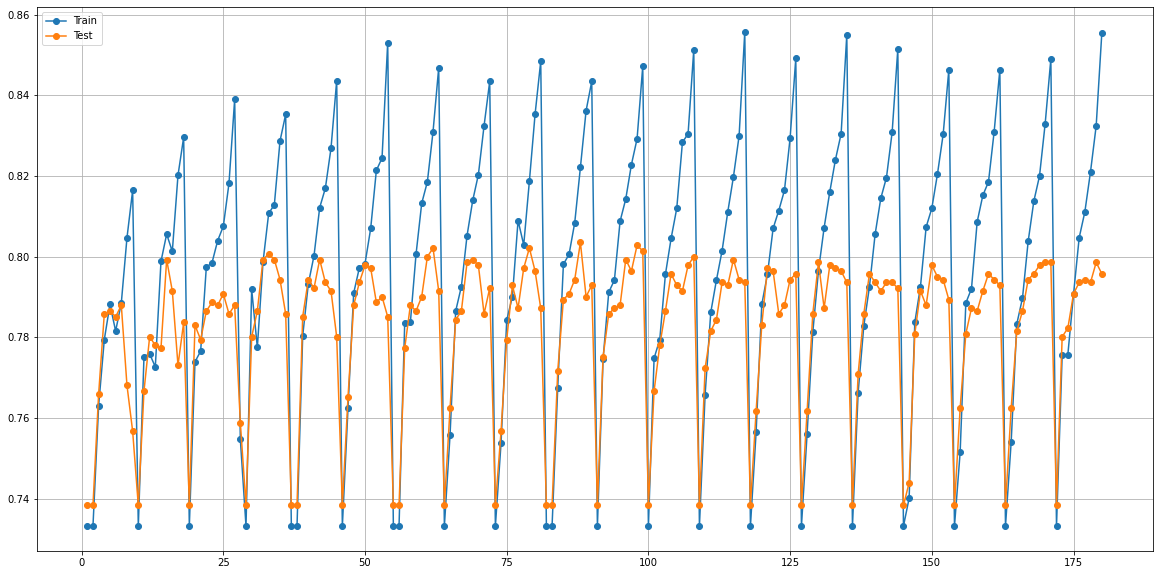

In [48]:
plt.figure(figsize = (20,10))
pyplot.plot(K_list, train_scores, '-o', label='Train')
pyplot.plot(K_list, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.grid()
pyplot.show()

In [49]:


model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=1)

model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({ 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output.to_csv('my_RandomForest_Prediction.csv', index=False) # saving results to csv

# Evaluation for Random Forest
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
print('Random Forest Accuracy is:')
test_acc

Random Forest Accuracy is:


0.7900709219858156

# Random Forest Feature Importance

In [50]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances

array([0.00000000e+00, 3.78149242e-03, 2.54079862e-03, 3.26463066e-04,
       1.72682493e-01, 2.96787982e-03, 1.03820123e-03, 5.81452387e-03,
       1.95483000e-04, 4.59197603e-03, 2.77303228e-03, 1.32942846e-03,
       1.45427614e-02, 6.56305543e-02, 2.04863872e-02, 0.00000000e+00,
       1.67845160e-02, 4.14600574e-03, 4.98094823e-03, 2.08446565e-04,
       6.19790750e-03, 4.07188511e-03, 1.43108473e-03, 3.49762409e-02,
       1.00803897e-01, 7.44938264e-03, 2.15243707e-01, 5.28953877e-03,
       8.21918094e-02, 0.00000000e+00, 1.03197711e-02, 6.15161962e-02,
       3.32720634e-03, 4.76352763e-03, 0.00000000e+00, 6.61987559e-03,
       8.80675746e-02, 0.00000000e+00, 4.97116200e-03, 0.00000000e+00,
       2.15997506e-03, 3.50469563e-05, 5.01400270e-05, 3.56926797e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [51]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

feature  importance
26                       contract_Month-to-month    0.215244
4                                         tenure    0.172682
24                   internetservice_Fiber optic    0.100804
36            tenuregroup_0-6 (up to six months)    0.088068
28                             contract_Two year    0.082192
13                                monthlycharges    0.065631
31                paymentmethod_Electronic check    0.061516
43                servicecategory_Phone&Internet    0.035693
23                           internetservice_DSL    0.034976
14                                  totalcharges    0.020486
16                              automaticpayment    0.016785
12                              paperlessbilling    0.014543
30         paymentmethod_Credit card (automatic)    0.010320
25                            internetservice_No    0.007449
35      seniorcitzen_partner_lonely SeniorCitzen    0.006620
20                              multiplelines_No    0.006198
7                                   onlinebackup    0.005815
27                             contract_One year    0.005290
18                             hasonlineservices    0.004981
38                 tenuregroup_25-48 (2-4 years)    0.004971
33         seniorcitzen_partner_NOT_SeniorCitzen    0.004764
9                                    techsupport    0.004592
17                                onlineservices    0.004146
21                multiplelines_No phone service    0.004072
1                                  seniorcitizen    0.003781
32                    paymentmethod_Mailed check    0.003327
5                                   phoneservice    0.002968
10                                   streamingtv    0.002773
2                                        partner    0.002541
40          tenuregroup_7-12 (6 months - 1 year)    0.002160
22                             multiplelines_Yes    0.001431
11                               streamingmovies    0.001329
6                                 onlinesecurity    0.001038
3                                     dependents    0.000326
19                                  hasstreaming    0.000208
8                               deviceprotection    0.000195
42                         servicecategory_Phone    0.000050
41                      servicecategory_Internet    0.000035
44               phone service new_MultipleLines    0.000000
45                          phone service new_No    0.000000
0                                         gender    0.000000
39                tenuregroup_49+ (over 4 years)    0.000000
37                 tenuregroup_13-24 (1-2 years)    0.000000
34  seniorcitzen_partner_Not_lonely SeniorCitzen    0.000000
29       paymentmethod_Bank transfer (automatic)    0.000000
15                                    individual    0.000000
46                  phone service new_SingleLine    0.000000

In [189]:
print(len(feature_importances))
print(len(features))

47
47


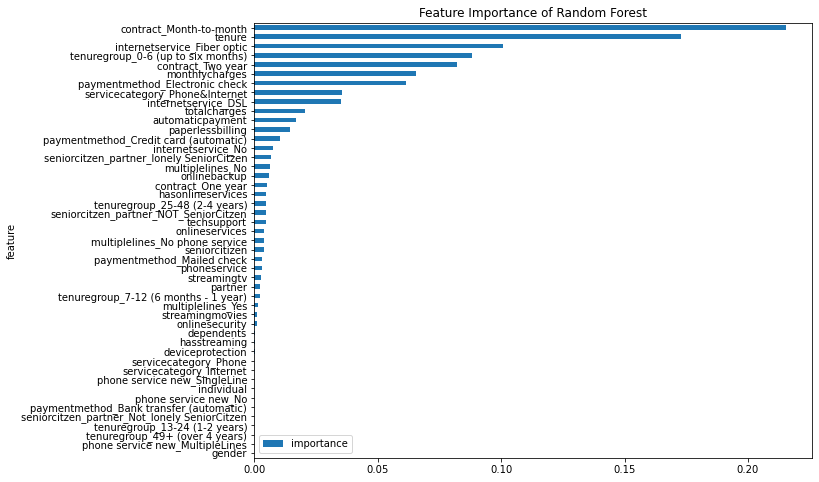

In [52]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh', figsize = (10,8))
plt.title('Feature Importance of Random Forest');

# KNN - K Nearest Neighbors

>1, train: 0.997, test: 0.713
>2, train: 0.859, test: 0.761
>3, train: 0.860, test: 0.746
>4, train: 0.835, test: 0.766
>5, train: 0.834, test: 0.765
>6, train: 0.820, test: 0.775
>7, train: 0.821, test: 0.767
>8, train: 0.814, test: 0.778
>9, train: 0.817, test: 0.774
>10, train: 0.815, test: 0.784
>11, train: 0.814, test: 0.780
>12, train: 0.810, test: 0.786
>13, train: 0.809, test: 0.776
>14, train: 0.806, test: 0.782
>15, train: 0.806, test: 0.779
>16, train: 0.804, test: 0.775
>17, train: 0.806, test: 0.783
>18, train: 0.801, test: 0.784
>19, train: 0.804, test: 0.787
>20, train: 0.801, test: 0.788
>21, train: 0.801, test: 0.786
>22, train: 0.797, test: 0.784
>23, train: 0.800, test: 0.789
>24, train: 0.796, test: 0.786
>25, train: 0.797, test: 0.787
>26, train: 0.796, test: 0.786
>27, train: 0.793, test: 0.787
>28, train: 0.793, test: 0.787
>29, train: 0.792, test: 0.784
>30, train: 0.792, test: 0.786
>31, train: 0.791, test: 0.784
>32, train: 0.791, test: 0.784
>33, train: 0.792

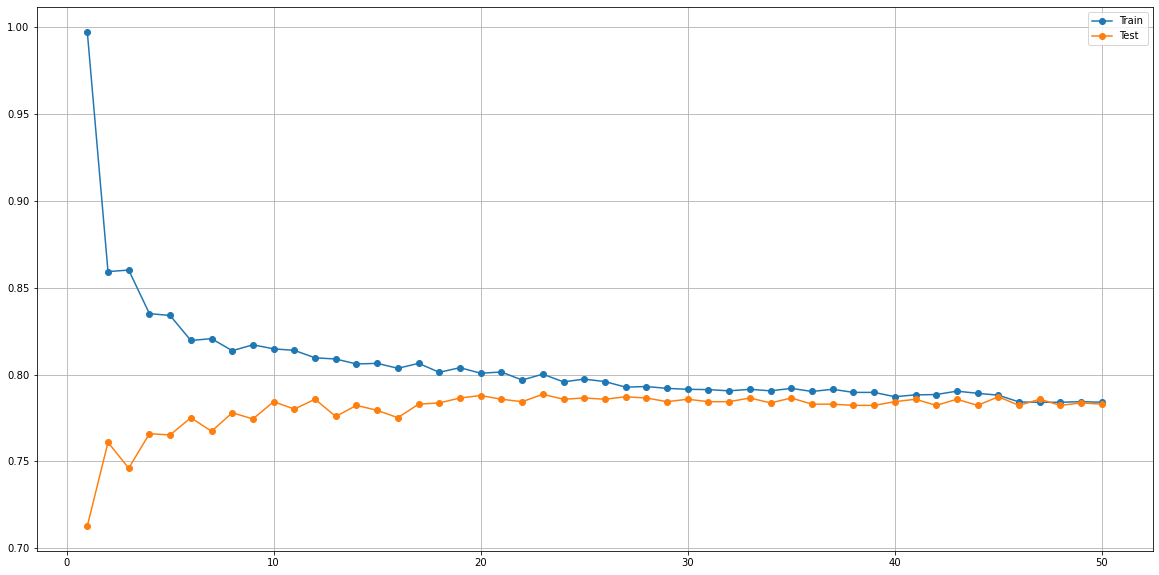

In [53]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.figure(figsize = (20,10))
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.grid()
pyplot.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=45)
# define the algorithm:
    # arg:
        # n_neighbors = number of neighbors
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False) # saving results to csv

# Evaluation for Knn
test_acc = accuracy_score(y_test, y_test_pred_Knn)
print('KNN Accuracy is:')
test_acc

KNN Accuracy is:


0.7872340425531915

KNN - Overfitting Solution

In [60]:
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn, 'churn_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction_scaled.csv', index=False) # saving results to csv

test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
print('KNN_Scaled Accuracy is:')
test_acc

KNN_Scaled Accuracy is:


0.7673758865248227

Looks like KNN not overfitted

# Step 4 - Benchmark


In [61]:
## Looking for a most common label in a training set - "0"
y_train.value_counts()

0.0    4122
1.0    1500
Name: churn, dtype: int64

In [62]:
import numpy as np

def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) --> Not Churned

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
## Benchmark Accuracy
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7382978723404255

# Conclusion

In [64]:
# Evaluation for Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7921985815602837

In [65]:
# Evaluation for Random Forest
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7900709219858156

In [66]:
# Evaluation for Knn
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7872340425531915

<br />
<br />
<br />
Best Accuracy: Decision Tree - 0.792.
<p>Benchmark Accuracy - 0.738.<br />
There is a significant impovment in accuracy of churn prediction when using model.